# DEEP LEARNING FOR COMPUTER VISION
## CHAPTER 2: IMAGE CLASSIFICATION
### Related pages: 37 to 53
#### PC Environment (Reference: page 28 to 31)
1. Windows 11 Pro OS
2. AMD RYZEN 7 5700X3D CPU
3. 32 GB DDR4 3200 MHz RAM
4. NVIDIA RTX 4070 SUPER GPU (Unsupported. Using TensorFlow CPU Compute)
5. NVIDIA CUDA 12.8 (Unsupported. Using TensorFlow CPU Compute)
6. Python 3.7.8
7. JetBrains PyCharm IDE
8. `pip install numpy scipy scikit-learn pillow h5py`
9. OpenCV 4.12.0 download: https://github.com/opencv/opencv/releases
10. How to set up for OpenCV Python on Windows: https://docs.opencv.org/4.x/d5/de5/tutorial_py_setup_in_windows.html
11. `pip install tensorflow==1.14.0`
12. `pip install protobuf==3.20.1`
13. `pip install tensorflow-gpu==1.14.0` (RTX 20 series only are supported)
14. Install CUDA 10.0 and CUDNN for CUDA 10.0 (RTX 20 series only are supported)

Dataset: MNIST

## MNIST Multilayer Convolutional Network (CNN)

In [1]:
# SECTION IMPORT LIBS
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

C:\Users\User\.virtualenvs\.venv\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\User\.virtualenvs\.venv\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\User\.virtualenvs\.venv\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\User\.virtualenvs\.venv\lib\site-packages\tensorflow\python\framework\dty

In [2]:
# SECTION Training the MNIST model in TensorFlow

# Load MNIST data
mnist_data = input_data.read_data_sets("MNIST_data", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
# Building a perceptron
# Defining placeholders for input data and targets
# Parameters
input_size = 784
no_classes = 10
batch_size = 100
total_batches = 200

# Setup input and targets
x_input = tf.placeholder(tf.float32, shape=[None, input_size])
y_input = tf.placeholder(tf.float32, shape=[None, no_classes])

In [4]:
# Define method to write summaries for TensorBoard
# 5 statistics added: mean, standard deviation, maximum, minimum, histogram.
# Summary is available in scalar or histogram.
def add_variable_summary(tf_variable, summary_name):
  with tf.name_scope(summary_name + '_summary'):
    mean = tf.reduce_mean(tf_variable)
    tf.summary.scalar('Mean', mean)
    with tf.name_scope('standard_deviation'):
        standard_deviation = tf.sqrt(tf.reduce_mean(
            tf.square(tf_variable - mean)))
    tf.summary.scalar('StandardDeviation', standard_deviation)
    tf.summary.scalar('Maximum', tf.reduce_max(tf_variable))
    tf.summary.scalar('Minimum', tf.reduce_min(tf_variable))
    tf.summary.histogram('Histogram', tf_variable)

In [5]:
# Unlike perceptron model, we resize the data into square and use it like 2D image.
# Reshape image to 28x28 pixels
x_input_reshape = tf.reshape(x_input, [-1, 28, 28, 1], name='input_reshape')
# The -1 there tells that the batch size can be any. The name param is used as reference when shown in TensorBoard later.

In [6]:
# Define method to create a 2D convolution layer where input, filters, kernels, activations are defined.
# Used when activation function requires to be Rectified Linear Unit (ReLU).
def convolution_layer(input_layer, filters, kernel_size=[3, 3], activation=tf.nn.relu):
    layer = tf.layers.conv2d(
        inputs=input_layer,
        filters=filters,
        kernel_size=kernel_size,
        activation=activation
    )
    # Store result as part of our summary in TensorBoard
    add_variable_summary(layer, 'convolution')
    return layer

# Define method to create a pooling layer.
def pooling_layer(input_layer, pool_size=[2, 2], strides=2):
    layer = tf.layers.max_pooling2d(
        inputs=input_layer,
        pool_size=pool_size,
        strides=strides
    )
    # Store result as part of our summary in TensorBoard
    add_variable_summary(layer, 'pooling')
    return layer

# Define method to create a dense layer.
def dense_layer(input_layer, units, activation=tf.nn.relu):
    layer = tf.layers.dense(
        inputs=input_layer,
        units=units,
        activation=activation
    )
    # Store result as part of our summary in TensorBoard
    add_variable_summary(layer, 'dense')
    return layer

In [7]:
# How do the 3 methods works together:
# 1. The pooling_layer takes feature map from convolution layer and reduce size to half by skipping using pool size and strides.
# 2. Add another convolution layer to transform the sampled features from first convolution layer to become better features.
# 3. Pool it again, then reshape the activations to linear and feed it to dense layers.
convolution_layer_1 = convolution_layer(x_input_reshape, 64)
pooling_layer_1 = pooling_layer(convolution_layer_1)
convolution_layer_2 = convolution_layer(pooling_layer_1, 128)
pooling_layer_2 = pooling_layer(convolution_layer_2)
flattened_pool = tf.reshape(pooling_layer_2, [-1, 5 * 5 * 128], name='flattened_pool')
dense_layer_bottleneck = dense_layer(flattened_pool, 1024)
# Some notable things:
# 1. 2 convolution layers has different filter size.
# 2. Kernel and stride parameters are chosen by experience.
# 3. The dense-layer purpose here is to take the flattened (single dimension) pool and map to 1024 hidden units.
# 4. The ReLU activation onto the hidden layer make this computation non-linear.

Instructions for updating:
Use `tf.keras.layers.Conv2D` instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Use keras.layers.MaxPooling2D instead.
Instructions for updating:
Use keras.layers.dense instead.


In [8]:
# Create a dropout layer with a rate of 0.4 and training mode as true.
dropout_bool = tf.placeholder(tf.bool)
dropout_layer = tf.layers.dropout(
        inputs=dense_layer_bottleneck,
        rate=0.4,
        training=dropout_bool
    )

# Feed the dropout layer to a dense layer, which is a logits.
# Logits is a layer with activations leading to the number of classes.
# The activation will be spiked for a class, which is the target class (the number identified by the model).
logits = dense_layer(dropout_layer, no_classes)

Instructions for updating:
Use keras.layers.dropout instead.


In [9]:
# Let the logits pass through the softmax layer, and then the cross-entropy calculation as performed in Perceptron.
# The scope name "loss" is added for the visualization in TensorBoard.
with tf.name_scope('loss'):
    softmax_cross_entropy = tf.nn.softmax_cross_entropy_with_logits(
        labels=y_input, logits=logits)
    loss_operation = tf.reduce_mean(softmax_cross_entropy, name='loss')
    tf.summary.scalar('loss', loss_operation)

# Optimize the loss function with Adam Optimizer.
with tf.name_scope('optimiser'):
    optimiser = tf.train.AdamOptimizer().minimize(loss_operation)

# Calculate the accuracy with name scopes for correct predictions and accuracy calculation.
with tf.name_scope('accuracy'):
    with tf.name_scope('correct_prediction'):
        predictions = tf.argmax(logits, 1)
        correct_predictions = tf.equal(predictions, tf.argmax(y_input, 1))
    with tf.name_scope('accuracy'):
        accuracy_operation = tf.reduce_mean(
            tf.cast(correct_predictions, tf.float32))
# Add scalar summary for the accuracy.
tf.summary.scalar('accuracy', accuracy_operation)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.




<tf.Tensor 'accuracy_1:0' shape=() dtype=string>

In [10]:
# Start TensorFlow session.
session = tf.Session()
session.run(tf.global_variables_initializer())

# Merge summaries and export it into files.
merged_summary_operation = tf.summary.merge_all()
train_summary_writer = tf.summary.FileWriter('C:\\Users\\User\\PyCharmMiscProject\\tmp\\train', session.graph)
test_summary_writer = tf.summary.FileWriter('C:\\Users\\User\\PyCharmMiscProject\\tmp\\test')

In [11]:
# Load data in batches and start training.
test_images, test_labels = mnist_data.test.images, mnist_data.test.labels

for batch_no in range(total_batches):
    mnist_batch = mnist_data.train.next_batch(batch_size)
    train_images, train_labels = mnist_batch[0], mnist_batch[1]
    _, merged_summary = session.run([optimiser, merged_summary_operation],
                                    feed_dict={
        x_input: train_images,
        y_input: train_labels,
        dropout_bool: True
    })
    train_summary_writer.add_summary(merged_summary, batch_no)
    if batch_no % 10 == 0:
        merged_summary, _ = session.run([merged_summary_operation,
                                         accuracy_operation], feed_dict={
            x_input: test_images,
            y_input: test_labels,
            dropout_bool: False
        })
        test_summary_writer.add_summary(merged_summary, batch_no)

## Let's see the Graph in TensorBoard.
1. `tensorboard --logdir=".\tmp\train"`

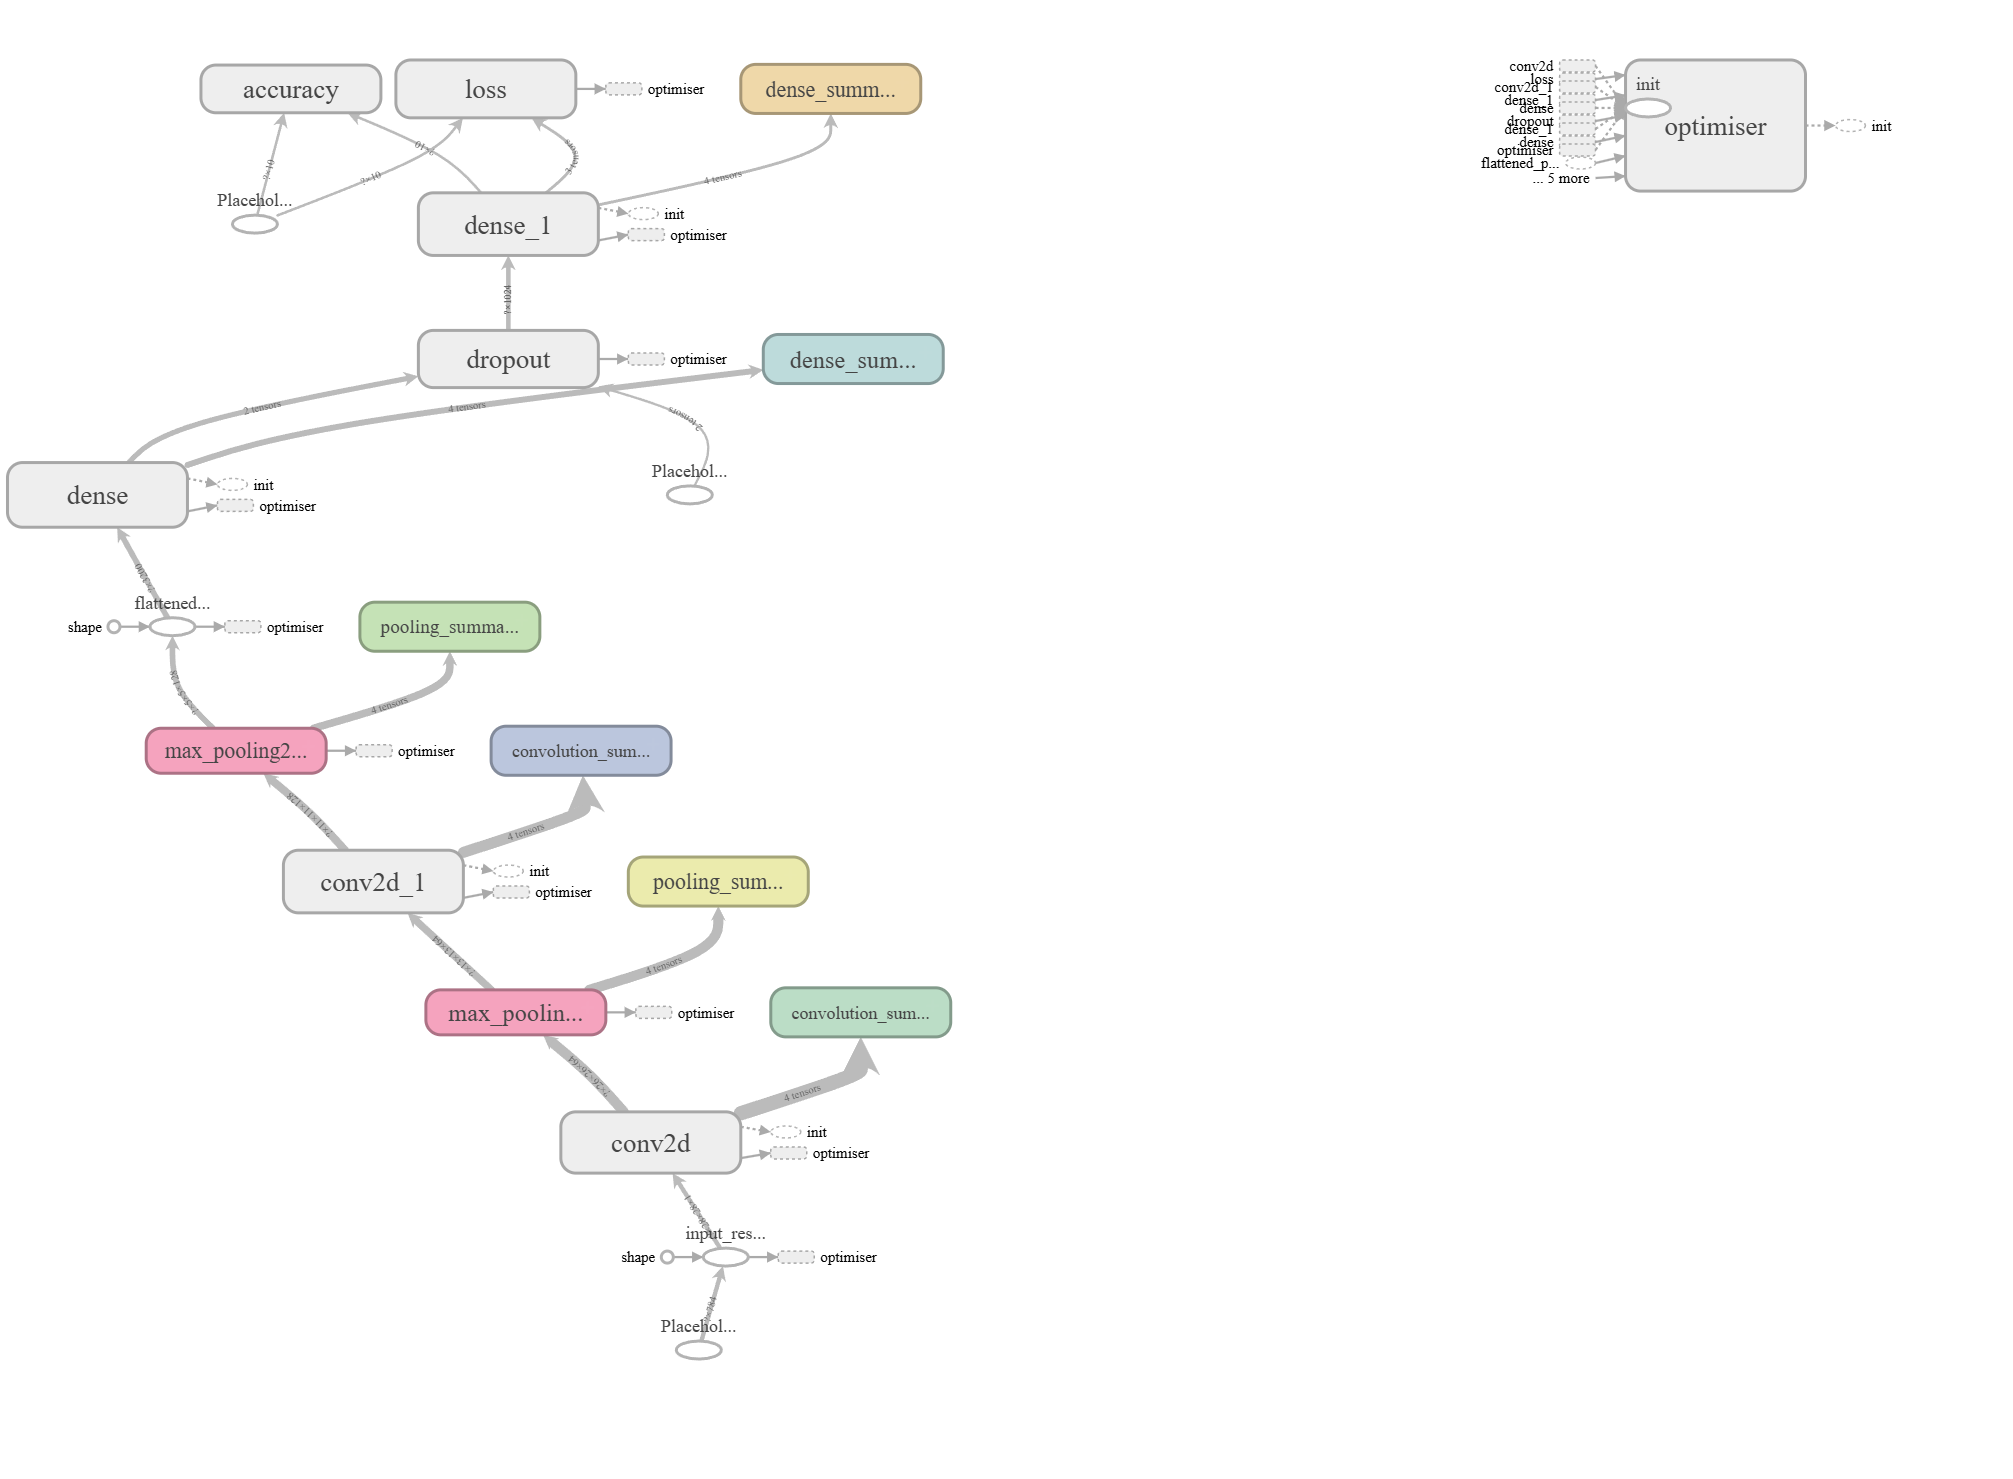